In [102]:
import numpy as np
import pandas as pd


In [103]:
df=pd.DataFrame()

In [104]:

df['X1']=[1,2,3,4,5,6,6,7,9,9]
df['X2']=[5,3,6,8,1,9,5,8,9,2]
df['label']=[1,1,0,1,0,1,0,1,0,0]

In [105]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

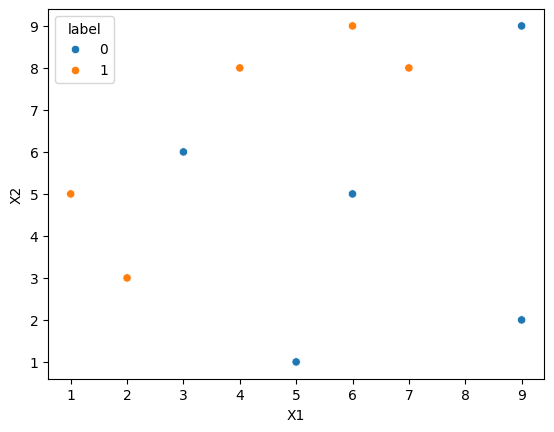

In [106]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

Stage 1

1) Assigning equal weights to all rows

In [107]:
df['weights']=1/df.shape[0]

In [108]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


2) Training Decision stump

In [109]:
from sklearn.tree import DecisionTreeClassifier

In [110]:
dt1=DecisionTreeClassifier(max_depth=1)

In [111]:
X=df.drop(columns=['weights','label'])
y=df['label']

In [112]:
X

,X1,X2
0,1,5
1,2,3
2,3,6
3,4,8
4,5,1
5,6,9
6,6,5
7,7,8
8,9,9
9,9,2


In [113]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

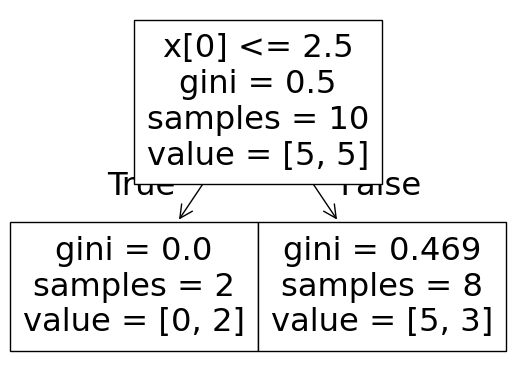

In [114]:
from sklearn.tree import plot_tree
plot_tree(dt1)

In [115]:
from mlxtend.plotting import plot_decision_regions

c:\Users\acer\Desktop\Machine_learning\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

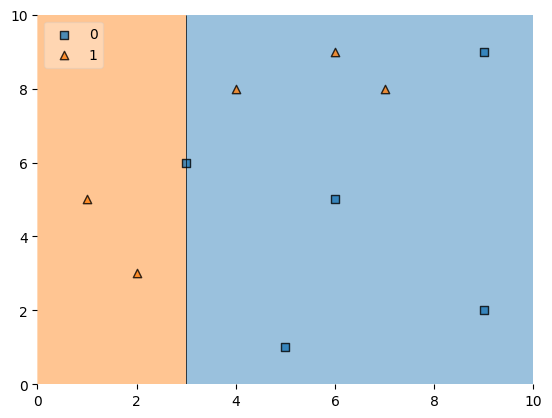

In [116]:
plot_decision_regions(X.values,y.values,clf=dt1,legend=2)

In [117]:
df['y_pred']=dt1.predict(X)

In [118]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


3 mistakes

3) Finding weightage of this model

In [119]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/error+0.00001)


In [120]:
alpha1=calculate_model_weight(0.3)  # error=sum of wt of mistaken rows
alpha1

np.float64(0.4236510730461529)

4.Update weights

In [121]:
def update_row_weights(row,alpha=0.423):
    if row['label']==row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)

In [122]:
df['updated_weights']=df.apply(update_row_weights,axis=1)

In [123]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [124]:
df['updated_weights'].sum(
)

np.float64(0.9165153319682015)

In [125]:
#normalization
df['normalized_weights']=df['updated_weights']/df['updated_weights'].sum()

In [126]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [127]:
df['normalized_weights'].sum()

np.float64(1.0)

In [128]:
df['upper']=np.cumsum(df['normalized_weights'])
df['lower']=df['upper']-df['normalized_weights']

In [129]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,upper,lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,0,0.065508,0.071475,0.214425,0.142950
3,4,8,1,0.1,0,0.152653,0.166559,0.380983,0.214425
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,0,0.152653,0.166559,0.619017,0.452458
6,6,5,0,0.1,0,0.065508,0.071475,0.690492,0.619017
7,7,8,1,0.1,0,0.152653,0.166559,0.857050,0.690492
8,9,9,0,0.1,0,0.065508,0.071475,0.928525,0.857050
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


Create new dataset from random numbers


In [130]:
def new_dataset_indices(df):
    indices=[]
    for i in range(df.shape[0]):
        a=np.random.random()
        for index,row in df.iterrows():
            if row['upper']>a and row['lower']<a:
                indices.append(index)
    return indices

In [131]:
index=new_dataset_indices(df)
index

[6, 2, 7, 3, 0, 3, 7, 8, 3, 4]

In [132]:
sec_df=df.iloc[index,[0,1,2,3]]

In [133]:
sec_df

,X1,X2,label,weights
6,6,5,0,0.1
2,3,6,0,0.1
7,7,8,1,0.1
3,4,8,1,0.1
0,1,5,1,0.1
3,4,8,1,0.1
7,7,8,1,0.1
8,9,9,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1


In [134]:
dt2=DecisionTreeClassifier(max_depth=1)
X=sec_df.drop(columns=['weights','label'])
y=sec_df['label']

In [135]:
X

,X1,X2
6,6,5
2,3,6
7,7,8
3,4,8
0,1,5
3,4,8
7,7,8
8,9,9
3,4,8
4,5,1


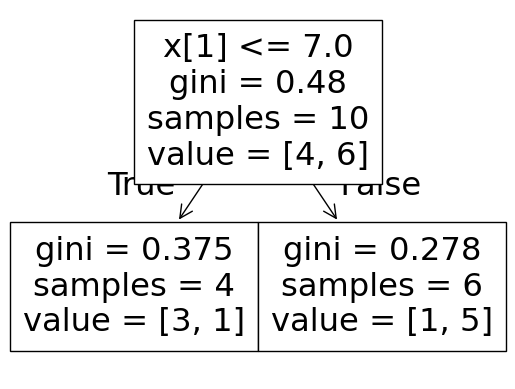

In [136]:

dt2.fit(X,y)


from sklearn.tree import plot_tree
plot_tree(dt2)
from mlxtend.plotting import plot_decision_regions




c:\Users\acer\Desktop\Machine_learning\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


,X1,X2,label,weights,y_pred
6,6,5,0,0.1,0
2,3,6,0,0.1,0
7,7,8,1,0.1,1
3,4,8,1,0.1,1
0,1,5,1,0.1,0
3,4,8,1,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0


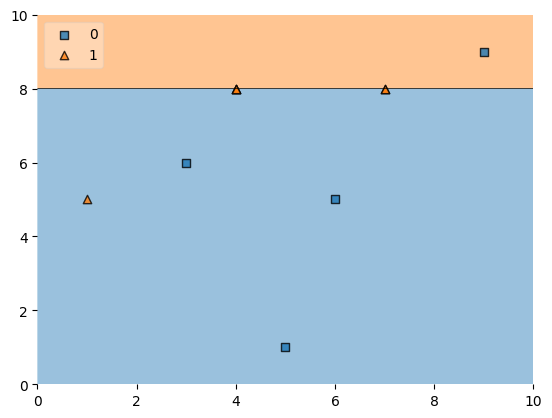

In [137]:
plot_decision_regions(X.values,y.values,clf=dt2,legend=2)
sec_df['y_pred']=dt2.predict(X)
sec_df


In [138]:
alpha2=calculate_model_weight(0.0000000000000001)
alpha2

np.float64(18.420680743952367)

In [139]:
def update_row_weights(row,alpha=18.420):
    if row['label']==row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)

sec_df['updated_weights']=sec_df.apply(update_row_weights,axis=1)
sec_df['normalized_weights']=sec_df['updated_weights']/sec_df['updated_weights'].sum()
sec_df['upper']=np.cumsum(sec_df['normalized_weights'])
sec_df['lower']=sec_df['upper']-sec_df['normalized_weights']
index=new_dataset_indices(sec_df)
index

thi_df=sec_df.iloc[index,[0,1,2,3]]

In [140]:
thi_df

,X1,X2,label,weights
3,4,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
6,6,5,0,0.1
3,4,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1


In [141]:
dt3=DecisionTreeClassifier(max_depth=1)
X=thi_df.drop(columns=['weights','label'])
y=thi_df['label']

In [142]:
y

3    1
3    1
3    1
6    0
3    1
3    1
3    1
3    1
3    1
3    1
Name: label, dtype: int64

In [143]:
dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 6.5\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.625, 0.5, '  False')]

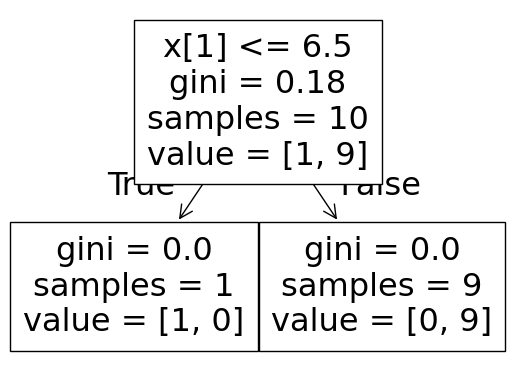

In [144]:
plot_tree(dt3)

c:\Users\acer\Desktop\Machine_learning\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


,X1,X2,label,weights,y_pred
3,4,8,1,0.1,1
3,4,8,1,0.1,1
3,4,8,1,0.1,1
6,6,5,0,0.1,0
3,4,8,1,0.1,1
3,4,8,1,0.1,1
3,4,8,1,0.1,1
3,4,8,1,0.1,1
3,4,8,1,0.1,1
3,4,8,1,0.1,1


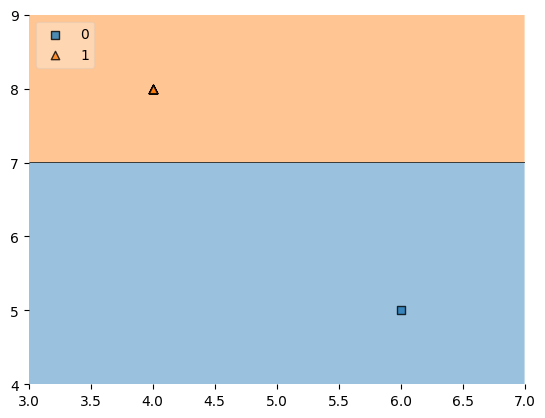

In [145]:
plot_decision_regions(X.values,y.values,clf=dt3,legend=2)
thi_df['y_pred']=dt3.predict(X)
thi_df


In [146]:
alpha3=calculate_model_weight(0.0000000000000001)
alpha3

np.float64(18.420680743952367)

In [147]:
print(alpha1,alpha2,alpha3)

0.4236510730461529 18.420680743952367 18.420680743952367


In [148]:
df=pd.DataFrame()
df['X1']=[1,2,3,4,5,6,6,7,9,9]
df['X2']=[5,3,6,8,1,9,5,8,9,2]
df['label']=[1,1,0,1,0,1,0,1,0,0]

In [149]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


prediction

In [150]:
query=np.array([1,5]).reshape(1,2)
dt1.predict(query)

c:\Users\acer\Desktop\Machine_learning\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [151]:
dt2.predict(query)


c:\Users\acer\Desktop\Machine_learning\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [152]:
dt3.predict(query)

c:\Users\acer\Desktop\Machine_learning\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [154]:
alpha1*1+alpha2*-1+alpha3*-1

np.float64(-36.41771041485858)

so considered 0